### Twitter Dataset
## 1 Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
result = pd.DataFrame()
desired_columns=['name','username','features','likes_count','retweets_count','replies_count','tweet']
with pd.read_json('twitter_features.json', lines=True, chunksize=20000) as reader:
    reader
    for chunk in reader:
        chunk = chunk[desired_columns]
        result = pd.concat([result, chunk], ignore_index=True)
        print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            20000 non-null  object
 1   username        20000 non-null  object
 2   features        20000 non-null  object
 3   likes_count     20000 non-null  int64 
 4   retweets_count  20000 non-null  int64 
 5   replies_count   20000 non-null  int64 
 6   tweet           20000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            40000 non-null  object
 1   username        40000 non-null  object
 2   features        40000 non-null  object
 3   likes_count     40000 non-null  int64 
 4   retweets_count  40000 non-null  int64 
 5   replies_count   4000

In [3]:
result.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Barack Obama,barackobama,"[0.032840799999999996, 0.279632999999999, 0.30...",314,1698,111,JoeBiden The people I grew up with and my neig...
1,Barack Obama,barackobama,"[-0.1898005, 0.23507037500000003, 0.49903625, ...",566,2252,98,VP Biden War should always be the absolute las...
2,Barack Obama,barackobama,"[-0.094298928571428, 0.136600214285714, 0.4788...",217,748,212,VP Biden on Iran These are the most crippling ...
3,Barack Obama,barackobama,"[-0.1626531, 0.21753979999999998, 0.3880757999...",103,531,83,Watch live JoeBiden lays out the ObamaBiden pl...
4,Barack Obama,barackobama,"[-0.30785029999999997, 0.2269174, 0.2245550999...",66,257,46,Be sure to follow OFADebates during tonights V...


In [4]:
print(len(result.groupby('name').size().loc[(result.groupby('name').size()>10000).values]))
result.groupby('name').size().loc[(result.groupby('name').size()>10000).values]

12


name
Amy Klobuchar        12008
Andrew Cuomo         22324
Andrew Yang          11087
Bernie Sanders       14201
Chuck Schumer        18513
Cory Booker          48228
Donna Brazile        35426
Elizabeth Warren     14596
Gov Mike Huckabee    11022
Marco Rubio          11957
Newt Gingrich        15489
Ted Cruz             15201
dtype: int64

In [5]:
noisy_politicians=['Amy Klobuchar','Andrew Cuomo','Andrew Yang','Bernie Sanders','Chuck Schumer','Cory Booker','Donna Brazile','Elizabeth Warren','Gov Mike Huckabee','Marco Rubio','Newt Gingrich','Ted Cruz']
df = result.loc[result.name.isin(noisy_politicians)].reset_index().drop(columns='index')
df.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Bernie Sanders,berniesanders,"[-0.055674476190476004, 0.292833904761904, 0.2...",10442,1253,601,To me it is a nobrainer Congress must provide ...
1,Bernie Sanders,berniesanders,"[-0.0050365526315780005, 0.298186578947368, 0....",5486,838,298,Workers at meat processing plants at Amazon an...
2,Bernie Sanders,berniesanders,"[-0.08720611111111101, 0.346515666666666, 0.34...",4673,662,352,The economy is in shambles Tens of millions o...
3,Bernie Sanders,berniesanders,"[-0.044685235294117005, 0.30909044117647, 0.37...",18874,1896,655,We cannot turn our backs on families who are s...
4,Bernie Sanders,berniesanders,"[-0.06416619047619, 0.321192799999999, 0.36969...",6165,862,231,Every now and then it might be a good idea for...


In [6]:
## creating the icml dataset
l = df.features.tolist()
icml_data = pd.DataFrame(l,columns=[i for i in range(len(df.features[1]))])
icml_data['username'] = df['username'].reset_index().drop(columns='index')
icml_data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,username
0,-0.055674,0.292834,0.231270,0.032957,0.058904,0.414533,-0.100740,0.398641,-0.180157,-0.019327,...,0.000400,0.643991,0.223652,0.476190,0.288348,1,1.000000,3.407372,0.000000,berniesanders
1,-0.005037,0.298187,0.239083,-0.057272,-0.166949,0.073428,-0.229787,0.215620,-0.111965,-0.012826,...,-0.000821,0.502770,0.275460,0.486842,0.288575,4,0.921053,2.572059,0.078947,berniesanders
2,-0.087206,0.346516,0.343665,0.043489,0.015261,0.224227,-0.282434,0.227176,-0.074052,-0.046036,...,-0.001338,0.600823,0.243042,0.481481,0.288477,2,0.962963,3.188134,0.037037,berniesanders
3,-0.044685,0.309090,0.372617,-0.120406,-0.099054,0.150205,-0.281176,0.196025,-0.068654,-0.057024,...,0.000724,0.745675,0.220084,0.485294,0.288550,3,0.941176,3.846853,0.058824,berniesanders
4,-0.064166,0.321193,0.369690,-0.202188,0.022773,0.220731,-0.238997,0.124914,-0.014269,-0.088575,...,0.002104,0.825397,0.152249,0.476190,0.288348,1,1.000000,3.993106,0.000000,berniesanders


In [7]:
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
%%time

X_ = df['tweet']
y_ = df['username']

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

   amyklobuchar       0.00      0.00      0.00      3928
     andrewyang       0.00      0.00      0.00      3716
  berniesanders       0.00      0.00      0.00      4630
     corybooker       0.21      1.00      0.35     15893
   donnabrazile       0.98      0.03      0.07     11859
        ewarren       1.00      0.00      0.00      4750
govmikehuckabee       1.00      0.01      0.01      3630
     marcorubio       1.00      0.00      0.00      3905
   newtgingrich       0.00      0.00      0.00      5088
     nygovcuomo       1.00      0.03      0.05      7384
     senschumer       0.00      0.00      0.00      6101
        tedcruz       0.00      0.00      0.00      5034

       accuracy                           0.22     75918
      macro avg       0.43      0.09      0.04     75918
   weighted avg       0.46      0.22      0.09     75918

CPU times: user 27.9 s, sys: 100 ms, total: 28 s
Wall time: 13.1 s


/home/pedro/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,15)

Confusion matrix, without normalization
[[    0     0     0  3928     0     0     0     0     0     0     0     0]
 [    0     0     0  3716     0     0     0     0     0     0     0     0]
 [    0     0     0  4629     1     0     0     0     0     0     0     0]
 [    0     0     0 15893     0     0     0     0     0     0     0     0]
 [    0     0     0 11446   413     0     0     0     0     0     0     0]
 [    0     0     0  4740     2     8     0     0     0     0     0     0]
 [    0     0     0  3605     1     0    24     0     0     0     0     0]
 [    0     0     0  3898     1     0     0     6     0     0     0     0]
 [    0     0     0  5088     0     0     0     0     0     0     0     0]
 [    0     0     0  7191     1     0     0     0     0   192     0     0]
 [    0     0     0  6101     0     0     0     0     0     0     0     0]
 [    0     0     0  5032     2     0     0     0     0     0     0     0]]
Normalized confusion matrix
[[0.00000000e+00 0.00000000e+00

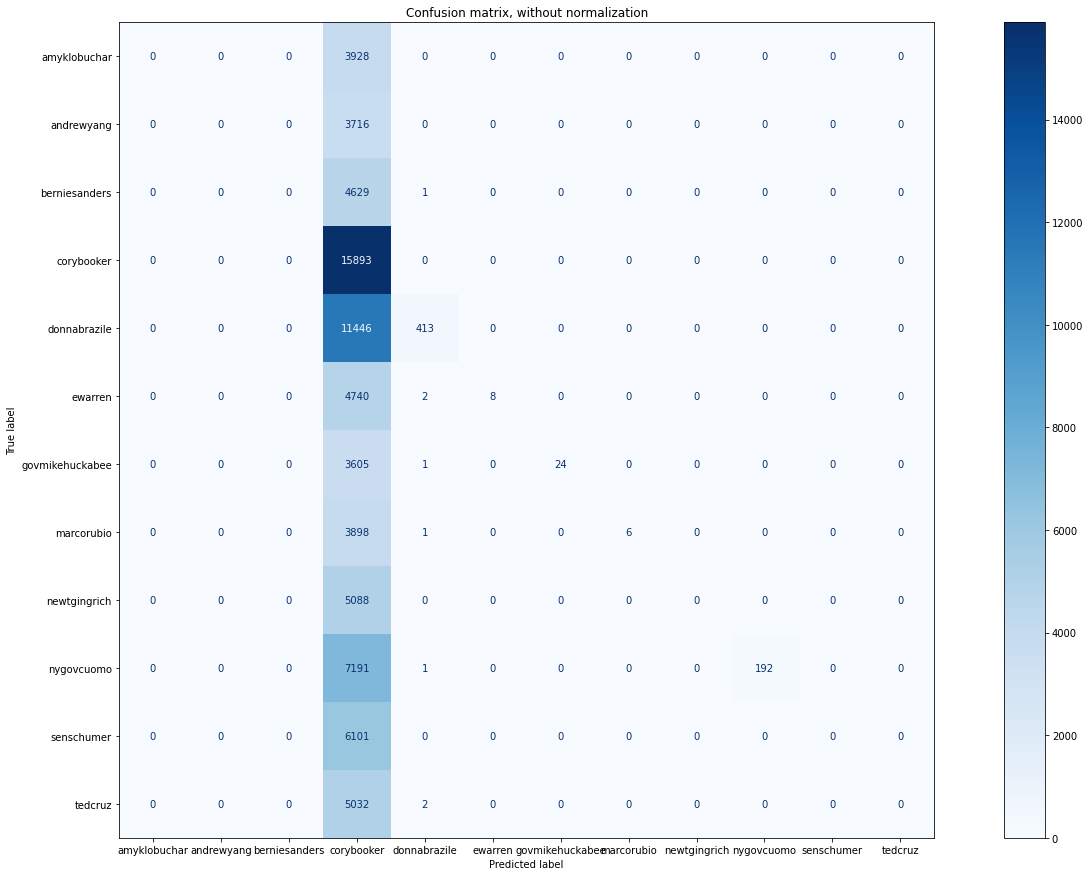

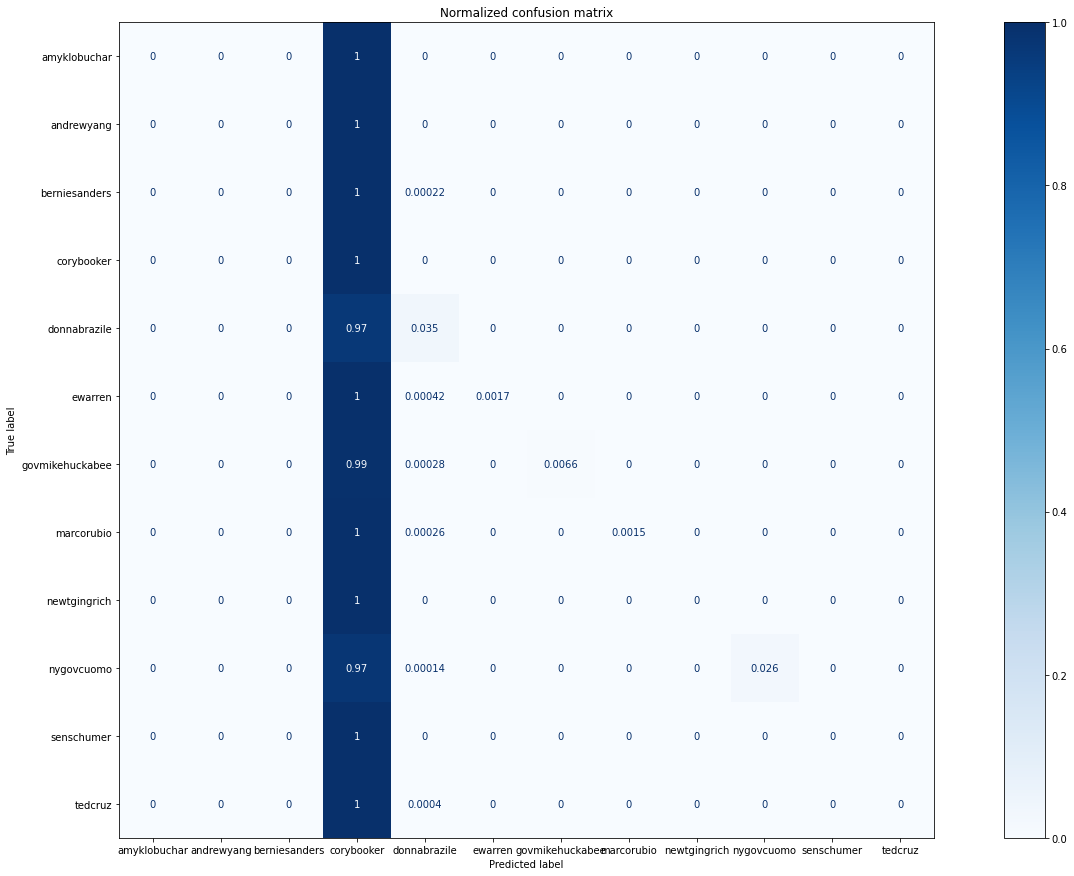

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier

X_ =  icml_data.iloc[:,0:119]
y_ = icml_data['username']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)

In [15]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   amyklobuchar       0.42      0.04      0.08      3928
     andrewyang       0.78      0.03      0.05      3716
  berniesanders       0.52      0.22      0.31      4630
     corybooker       0.43      0.80      0.56     15893
   donnabrazile       0.35      0.61      0.45     11859
        ewarren       0.32      0.59      0.42      4750
govmikehuckabee       0.55      0.23      0.32      3630
     marcorubio       0.55      0.19      0.29      3905
   newtgingrich       0.77      0.22      0.34      5088
     nygovcuomo       0.50      0.54      0.52      7384
     senschumer       0.56      0.23      0.33      6101
        tedcruz       0.75      0.04      0.08      5034

       accuracy                           0.43     75918
      macro avg       0.54      0.31      0.31     75918
   weighted avg       0.51      0.43      0.37     75918



Confusion matrix, without normalization
[[  179     4    64  1194   886   784   115    58    28   400   212     4]
 [   42    94   137  1763   672   685    40    49    22   187    23     2]
 [   22     3  1068   836  1263  1020    25    39    19   229    95    11]
 [   15     2   120 12664  1518   596    41    35    13   797    86     6]
 [   16     4   121  3312  7252   415    71    47    29   488    91    13]
 [   16     1   138   907   577  2817    43    26    12   109    94    10]
 [   11     3    13  1218  1098   223   823    42    44   108    35    12]
 [   23     9    78  1030  1044   441    72   775    41   243   141     8]
 [    4     0    51  1163  1916   328    37    62  1127   301    93     6]
 [   24     5   109  1493  1087   442    19    65    29  3979   129     3]
 [   28     1    89  1452  1377   717    56   107    47   839  1384     4]
 [   15     1    49  1986  1933   158   170    95    45   265    77   240]]
Normalized confusion matrix
[[4.55702648e-02 1.01832994e-03

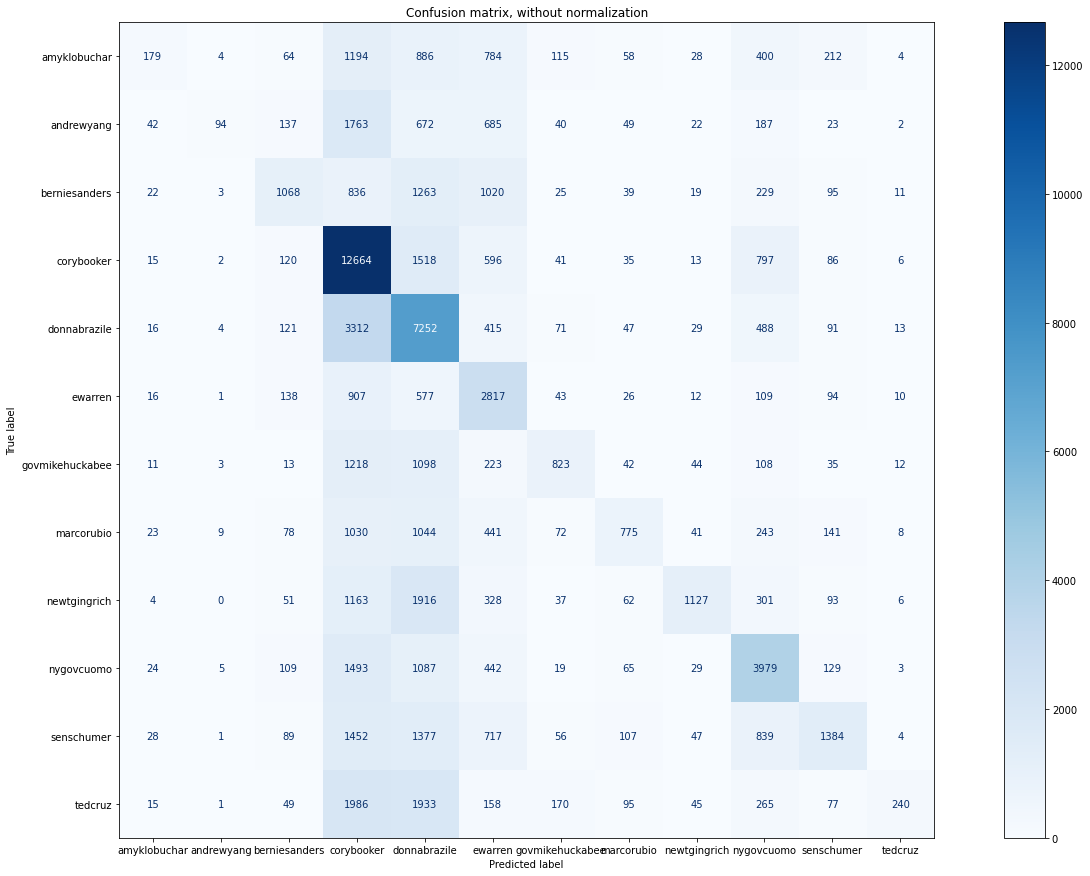

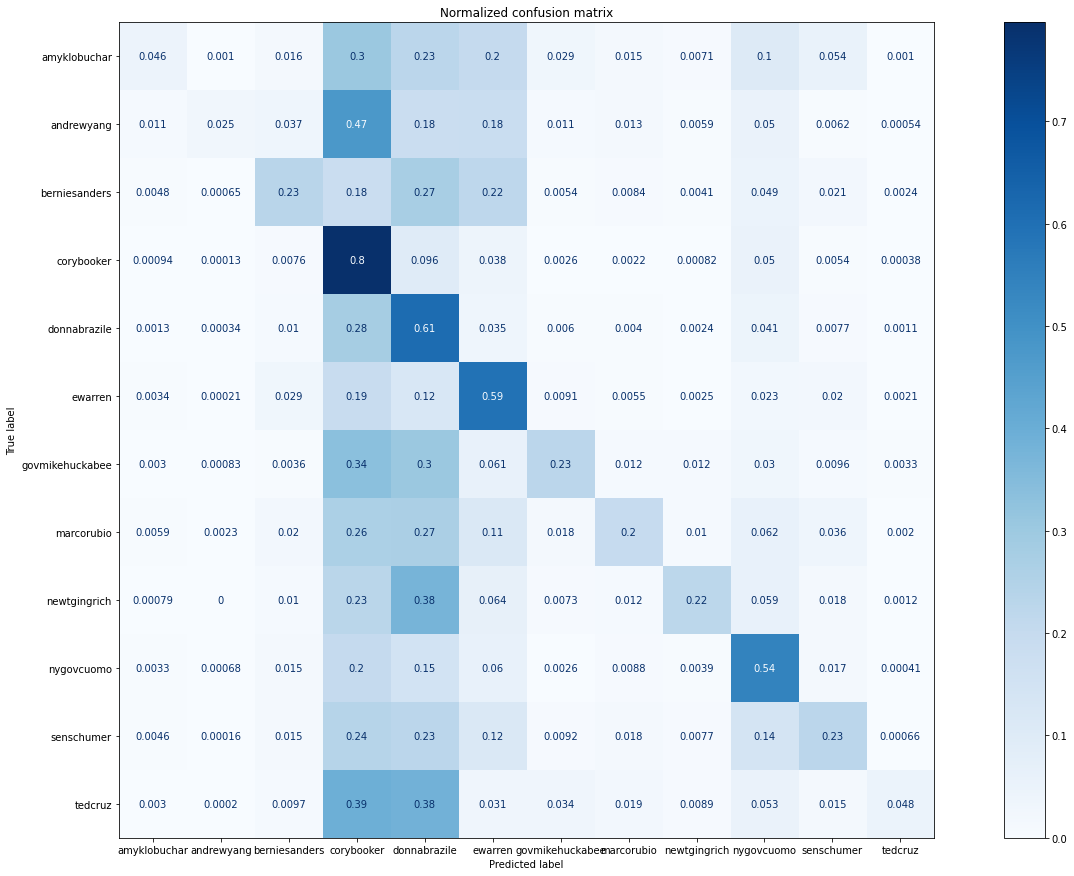

In [13]:
#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()